In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#  Исследование интернет-магазина «Стримчик»

Интернет-магазин «Стримчик», специализирующийся на продаже компьютерных игр по всему миру, анализирует исторические данные о продажах, оценки пользователей и экспертов, а также информацию о жанрах и платформах (таких как Xbox, PlayStation или PC). Цель исследования — выявить ключевые закономерности, определяющие успешность игр, и понять, какие факторы влияют на их популярность.

# 1 Блок

In [ ]:
data = pd.read_csv('/datasets/games.csv')

In [ ]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# 2 Блок

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
duplicates = data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

# Вывод дубликатов (если они есть)
if not duplicates.empty:
    print("Найдены дубликаты:")
    print(duplicates.sort_values(by=['name', 'platform', 'year_of_release']))
else:
    print("Дубликатов не найдено.")

# 2. Принятие решения о дубликатах
if not duplicates.empty:
    # Пример обработки дубликатов:
    # Удаление дубликатов, оставляя только первую запись
    data_cleaned = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')


Найдены дубликаты:
                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   

       jp_sales  other_sales  critic_score user_score rating  
604        0.00         0.23          83.0        5.5      E  
16230      0.00         0.00          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  


In [ ]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data['genre'] = data['genre'].fillna('unknown')
data['rating'] = data['rating'].fillna('unknown')
data['user_score'] = data['user_score'].replace('tbd', '-1')
data['user_score'] = data['user_score'].fillna('-1')
data['critic_score'] = data['critic_score'].fillna('-1')

Имена которые пропущены были удалены

Года реализации которые были пропущены были удалены

Жанр которые пропущены заполненны "unknown" потому что мы не можем заполнить любым другим Жанром

Рейтинги которые пропущены заполненны "unknown" потому что мы не можем заполнить любым другим Рейтингом

Оценки пользователей были заполненны -1 чтобы можно было в дальнейшем работать с данными

Оценки критиков были заполненны -1 чтобы можно было в дальнейшем работать с данными

TBD: означает отсутствие данных, которые будут определены позже. Его можно заменить на NaN, удалить строки или заменить на значение по умолчанию.(я заполнил значением -1)

Пропуски могут возникать из-за технических ошибок, отсутствия информации, человеческого фактора, неприменимости данных или их сокрытия.

В зависимости от причины, пропуски можно удалить, заменить или интерполировать.

In [ ]:
data.isnull().sum()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)
data['critic_score'] = data['critic_score'].astype(float)

Тип данных в столбце year_of_release был изменён на INT так как нам нужно будет работать как с числом

Тип данных в столбце user_score был изменён на float так как нам нужно будет работать как с числом

Тип данных в столбце critic_score был изменён на float так как нам нужно будет работать как с числом

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data['sales_all'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


В данном блоке были убраны нулевые значения и неявные дубликаты. Так же была проверка на явные дубликаты которых не оказалось. И ещё были изменены некоторые типы данных.

# 3 Блок

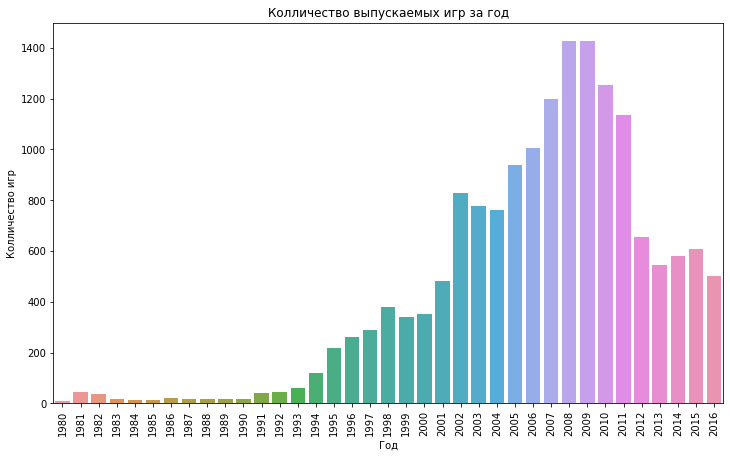

In [ ]:
years = data.groupby('year_of_release')['name'].count()

plt.figure(figsize=(12, 7))
sns.barplot(x=years.index, y=years.values)

# Оформление графика
plt.xticks(rotation=90)
plt.xlabel('Год')
plt.ylabel('Колличество игр')
plt.title('Колличество выпускаемых игр за год')
plt.show()

Из этих данных можно с уверенностью сказать, что основные данные будут с 2006 года и по 2016, но актуальными будут являться данные за 2015 и 2016 года.

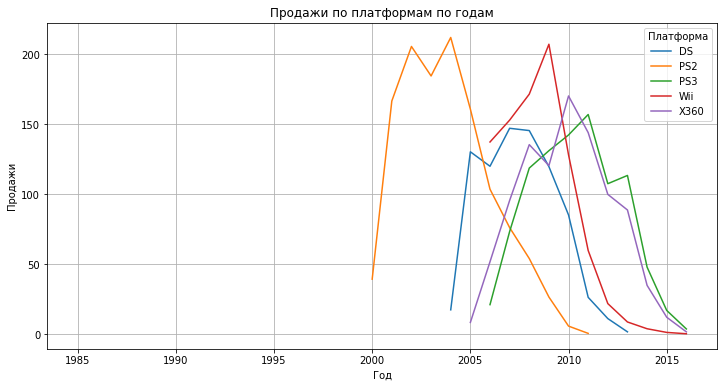

Средний срок жизни платформы: 7.6 лет


In [ ]:
# Удаляем строки, где год равен 0
data = data[data['year_of_release'] != 0]

# 1. Топ платформ по продажам
top_platforms = data.groupby('platform')['sales_all'].sum().nlargest(5).index.tolist()

# 2. Фильтруем данные для топовых платформ
top_data = data[data['platform'].isin(top_platforms)]

# 3. Группируем по году и платформе, строим график
top_data.groupby(['year_of_release', 'platform'])['sales_all'].sum().unstack().plot(figsize=(12, 6))
plt.title('Продажи по платформам по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend(title='Платформа')
plt.show()

# 4. Считаем средний срок жизни платформ
life_span = data.groupby('platform')['year_of_release'].agg(lambda x: x.max() - x.min()).mean()
print(f"Средний срок жизни платформы: {life_span:.1f} лет")

In [ ]:
data = data[data['year_of_release'] >= 2013]

In [ ]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


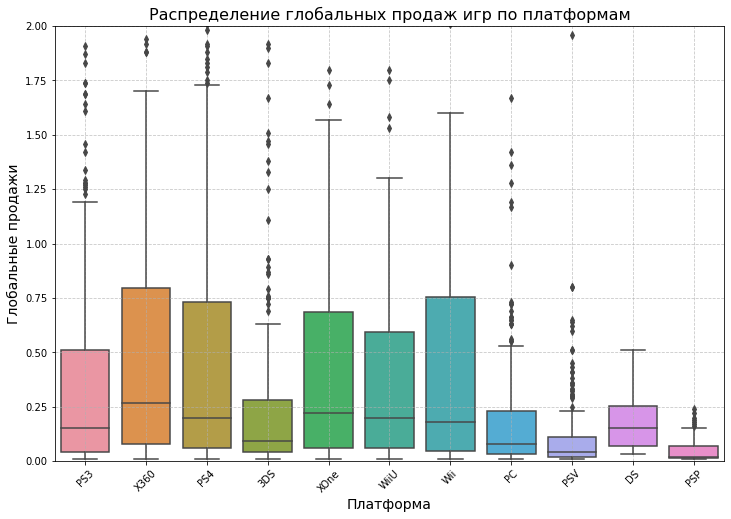

In [ ]:
plt.figure(figsize=(12, 8))  # Размер графика
sns.boxplot(x='platform', y='sales_all', data=data)  # Построение boxplot

# Ограничиваем ось Y, чтобы лучше видеть медиану и квантили
plt.ylim(0, 2)  # Устанавливаем верхний предел оси Y

# Настройка графика
plt.title('Распределение глобальных продаж игр по платформам', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Глобальные продажи', fontsize=14)
plt.xticks(rotation=45)  # Поворот подписей платформ для удобства
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Больше всего за актуальный период больше всего продаются игры для PS4, а меньше всего продаются игра на PSP

Топ-5 платформ по глобальным продажам:
   platform  sales_all
4       PS4     314.14
3       PS3     181.43
10     XOne     159.32
0       3DS     143.25
9      X360     136.80


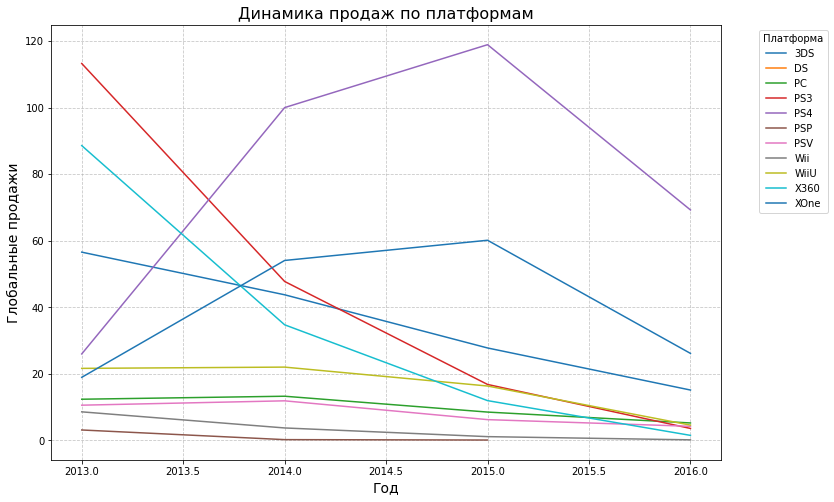

In [ ]:
platform_sales = data.groupby('platform')['sales_all'].sum().reset_index()

# Сортируем по убыванию продаж
platform_sales = platform_sales.sort_values(by='sales_all', ascending=False)

# Выводим топ-5 платформ по продажам
print("Топ-5 платформ по глобальным продажам:")
print(platform_sales.head(5))

# 3. Анализ динамики продаж по платформам
# Группируем данные по платформам и годам, считаем суммарные продажи
platform_year_sales = data.groupby(['platform', 'year_of_release'])['sales_all'].sum().unstack()

# Визуализация динамики продаж по платформам
platform_year_sales.T.plot(figsize=(12, 8))  # Транспонируем данные для удобства
plt.title('Динамика продаж по платформам', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Глобальные продажи', fontsize=14)
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Лидирующие платформы: Судя по данным, платформы PS4 и XOne демонстрируют значительные объемы продаж в период с 2013 по 2016 год. Это может быть связано с выпуском новых игр и популярностью консолей среди пользователей.

Снижение продаж на старых платформах: Платформы, такие как PS3 и X360, показывают снижение продаж, что ожидаемо, учитывая выход их более современных аналогов.

Рост PC-игр: Продажи на PC также демонстрируют стабильный рост, что может быть связано с увеличением популярности цифровых дистрибутивов и независимых игр.

Портативные платформы: Платформы PSP и PSV показывают относительно низкие продажи, что может указывать на снижение интереса к портативным игровым устройствам в этот период.

In [ ]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


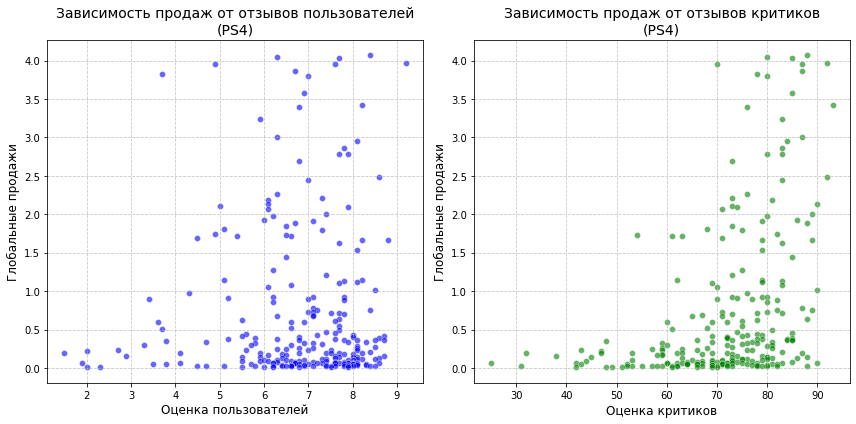

Корреляция между отзывами пользователей и продажами: 0.03
Корреляция между отзывами критиков и продажами: 0.41


In [ ]:
data = data[(data['critic_score'] > 0)&(data['user_score']>0)]
popular_platform = "PS4"
platform_data = data[data['platform'] == popular_platform]

# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Первый квартиль (25%)
    Q3 = df[column].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Межквартильный размах
    lower_bound = Q1 - 3 * IQR  # Нижняя граница
    upper_bound = Q3 + 3 * IQR  # Верхняя граница
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаляем выбросы для продаж и оценок
platform_data_cleaned = remove_outliers(platform_data, 'sales_all')
platform_data_cleaned = remove_outliers(platform_data_cleaned, 'user_score')
platform_data_cleaned = remove_outliers(platform_data_cleaned, 'critic_score')

# 2. Построение диаграммы рассеяния на очищенных данных
plt.figure(figsize=(12, 6))

# Диаграмма рассеяния: отзывы пользователей vs продажи
plt.subplot(1, 2, 1)  # Первый график
sns.scatterplot(x='user_score', y='sales_all', data=platform_data_cleaned, alpha=0.6, color='blue')
plt.title(f'Зависимость продаж от отзывов пользователей\n({popular_platform})', fontsize=14)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Глобальные продажи', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Диаграмма рассеяния: отзывы критиков vs продажи
plt.subplot(1, 2, 2)  # Второй график
sns.scatterplot(x='critic_score', y='sales_all', data=platform_data_cleaned, alpha=0.6, color='green')
plt.title(f'Зависимость продаж от отзывов критиков\n({popular_platform})', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Глобальные продажи', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Чтобы графики не перекрывались
plt.show()

# 3. Расчет корреляции на очищенных данных
correlation_user = platform_data_cleaned['user_score'].corr(platform_data_cleaned['sales_all'])
correlation_critic = platform_data_cleaned['critic_score'].corr(platform_data_cleaned['sales_all'])

print(f"Корреляция между отзывами пользователей и продажами: {correlation_user:.2f}")
print(f"Корреляция между отзывами критиков и продажами: {correlation_critic:.2f}")

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий студента</b>
    
Я не до конца понимаю. Я убрал те заглушки которые были и написал функцию по квартилям, чтобы убрать выбросы, но мне кажется, что не всё смог убрать как можно поправить это?
</div>

Продажи игр для PS4 слабо зависят как от отзывов пользователей, так и от оценок критиков. Это может указывать на то, что другие факторы, такие как маркетинг, бренд игры, франшиза или рекламные кампании, играют более важную роль в определении успешности продукта.

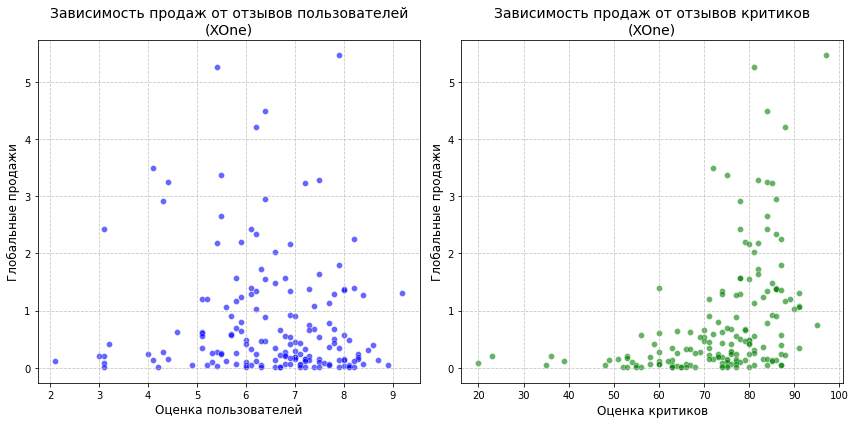

Платформа: XOne
Корреляция между отзывами пользователей и продажами: -0.09
Корреляция между отзывами критиков и продажами: 0.41


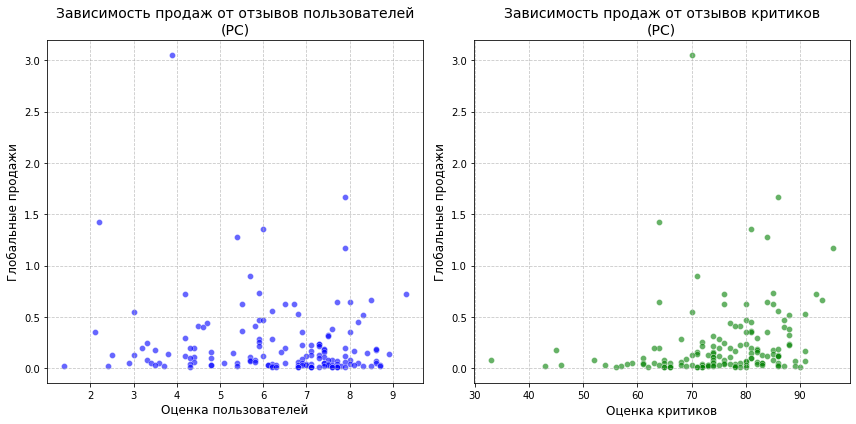

Платформа: PC
Корреляция между отзывами пользователей и продажами: -0.11
Корреляция между отзывами критиков и продажами: 0.19


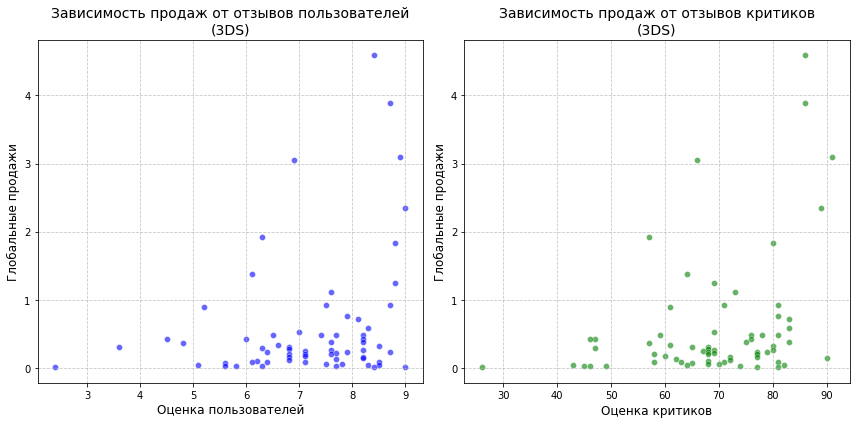

Платформа: 3DS
Корреляция между отзывами пользователей и продажами: 0.27
Корреляция между отзывами критиков и продажами: 0.34


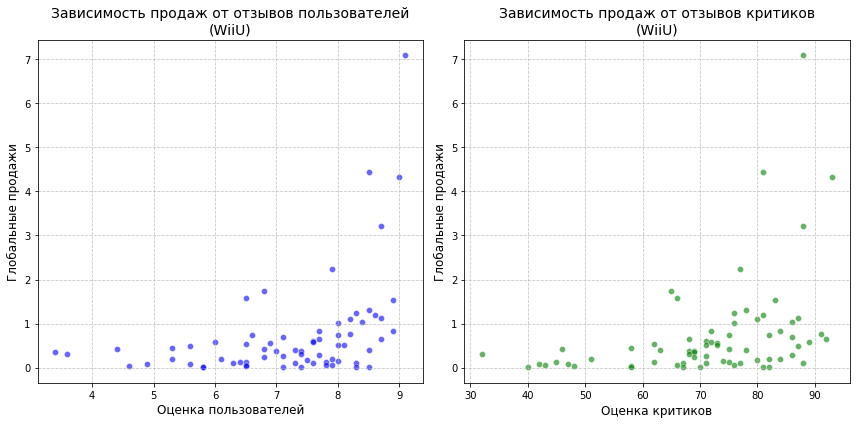

Платформа: WiiU
Корреляция между отзывами пользователей и продажами: 0.41
Корреляция между отзывами критиков и продажами: 0.38


In [ ]:
platforms = ['XOne', 'PC', '3DS', 'WiiU']  # Пример списка платформ

# Цикл для анализа каждой платформы
for platform in platforms:
    # Фильтруем данные по платформе
    platform_data = data[data['platform'] == platform]

    # Пропускаем платформу, если данных недостаточно
    if platform_data.empty:
        print(f"Для платформы {platform} данных недостаточно.")
        continue

    # 1. Построение диаграммы рассеяния
    plt.figure(figsize=(12, 6))

    # Диаграмма рассеяния: отзывы пользователей vs продажи
    plt.subplot(1, 2, 1)  # Первый график
    sns.scatterplot(x='user_score', y='sales_all', data=platform_data, alpha=0.6, color='blue')
    plt.title(f'Зависимость продаж от отзывов пользователей\n({platform})', fontsize=14)
    plt.xlabel('Оценка пользователей', fontsize=12)
    plt.ylabel('Глобальные продажи', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Диаграмма рассеяния: отзывы критиков vs продажи
    plt.subplot(1, 2, 2)  # Второй график
    sns.scatterplot(x='critic_score', y='sales_all', data=platform_data, alpha=0.6, color='green')
    plt.title(f'Зависимость продаж от отзывов критиков\n({platform})', fontsize=14)
    plt.xlabel('Оценка критиков', fontsize=12)
    plt.ylabel('Глобальные продажи', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()  # Чтобы графики не перекрывались
    plt.show()

    # 2. Расчет корреляции
    correlation_user = platform_data['user_score'].corr(platform_data['sales_all'])
    correlation_critic = platform_data['critic_score'].corr(platform_data['sales_all'])

    print(f"Платформа: {platform}")
    print(f"Корреляция между отзывами пользователей и продажами: {correlation_user:.2f}")
    print(f"Корреляция между отзывами критиков и продажами: {correlation_critic:.2f}")

Продажи игр на платформах слабо зависят от отзывов пользователей, но болле менее зависят от отзывов критиков, что схоже с ситуацией на PS4. Это может указывать на то, что другие факторы, такие как маркетинг, бренд игры и франшиза, играют более важную роль в определении успешности продукта.


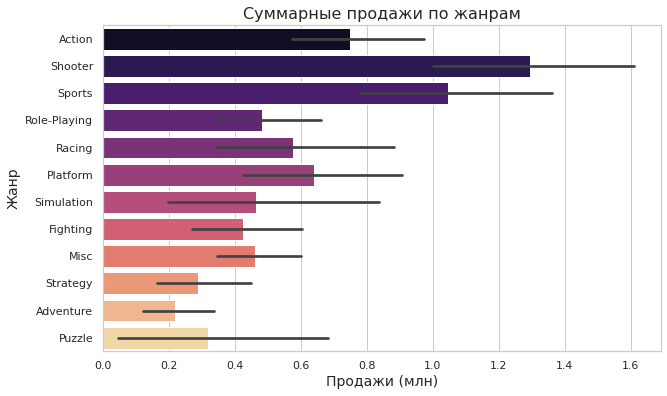

In [ ]:
sns.set(style="whitegrid")

# Создаем график
plt.figure(figsize=(10, 6))

# Строим barplot
sns.barplot(x='sales_all', y='genre', data=data, palette='magma')

# Добавляем заголовок и подписи осей
plt.title('Суммарные продажи по жанрам', fontsize=16)
plt.xlabel('Продажи (млн)', fontsize=14)
plt.ylabel('Жанр', fontsize=14)

# Показываем график
plt.show()

Наиболее популярные жанры: Жанры Action и Shooter демонстрируют самые высокие показатели продаж, что указывает на их популярность среди игроков. Это может быть связано с высокой вовлеченностью и интересом к динамичным и соревновательным играм.

Средние показатели продаж: Жанры Sports, Role-Playing и Racing показывают средние уровни продаж. Это говорит о стабильном интересе к этим категориям, но не таком высоком, как у Action и Shooter.

Менее популярные жанры: Жанры Platform, Simulation, Fighting, Misc, Strategy, Adventure и Puzzle имеют относительно низкие показатели продаж. Это может быть связано с меньшей аудиторией или нишевым характером данных жанров.

# 4 Блок

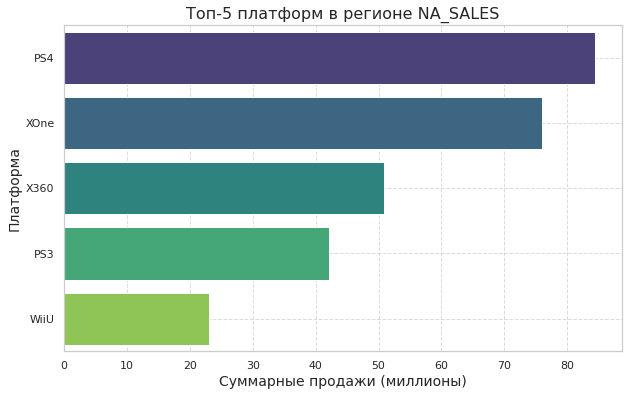

Топ-5 платформ в регионе NA_SALES:
  platform  na_sales
3      PS4     84.46
8     XOne     76.03
7     X360     50.85
2      PS3     42.13
6     WiiU     23.04


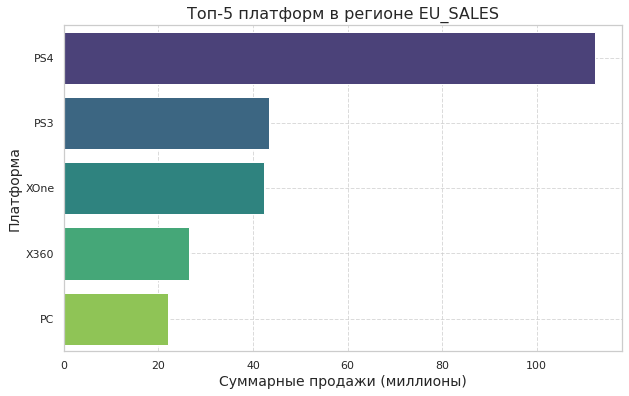

Топ-5 платформ в регионе EU_SALES:
  platform  eu_sales
3      PS4    112.44
2      PS3     43.29
8     XOne     42.23
7     X360     26.54
1       PC     21.93


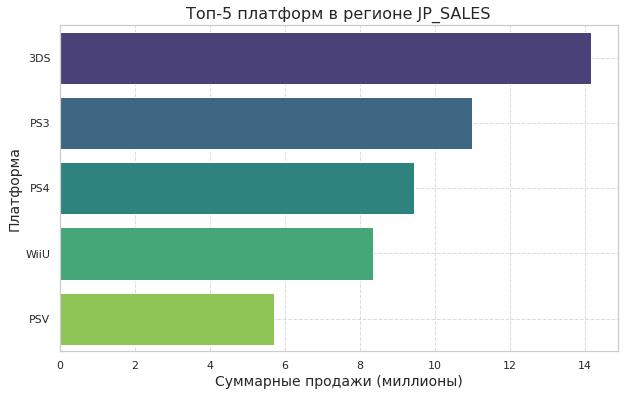

Топ-5 платформ в регионе JP_SALES:
  platform  jp_sales
0      3DS     14.16
2      PS3     10.99
3      PS4      9.43
6     WiiU      8.36
5      PSV      5.71


In [ ]:


# 1. Самые популярные платформы (топ-5) в каждом регионе
regions = ['na_sales', 'eu_sales', 'jp_sales']  # Список регионов

for region in regions:
    # Группируем по платформам и считаем суммарные продажи для региона
    platform_sales = data.groupby('platform')[region].sum().reset_index()

    # Сортируем по убыванию продаж
    platform_sales = platform_sales.sort_values(by=region, ascending=False)

    # Выбираем топ-5 платформ
    top_platforms = platform_sales.head(5)

    # Визуализация
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region, y='platform', data=top_platforms, palette='viridis')
    plt.title(f'Топ-5 платформ в регионе {region.upper()}', fontsize=16)
    plt.xlabel('Суммарные продажи (миллионы)', fontsize=14)
    plt.ylabel('Платформа', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Вывод топ-5 платформ
    print(f"Топ-5 платформ в регионе {region.upper()}:")
    print(top_platforms)

PS4 — король в Северной Америке и Европе, но в Японии его обгоняет портативная консоль 3DS.

Xbox One — силён в Северной Америке и Европе, но в Японии его почти не покупают.

3DS — любима в Японии, но в других регионах её популярность ниже.

PC — популярен в Европе, но в других регионах не так востребован.Ы

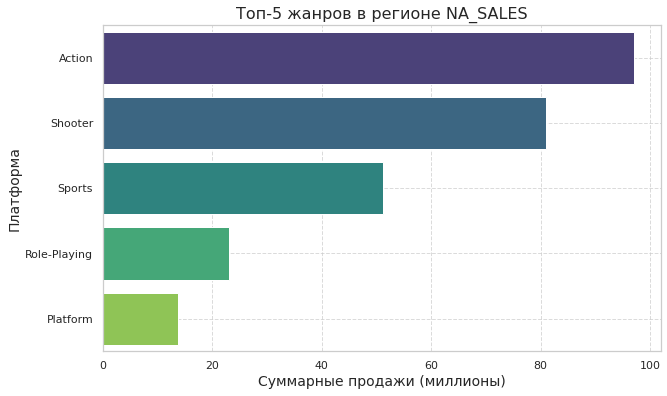

Топ-5 жанров в регионе NA_SALES:
           genre  na_sales
0         Action     97.06
8        Shooter     81.03
10        Sports     51.16
7   Role-Playing     23.08
4       Platform     13.75


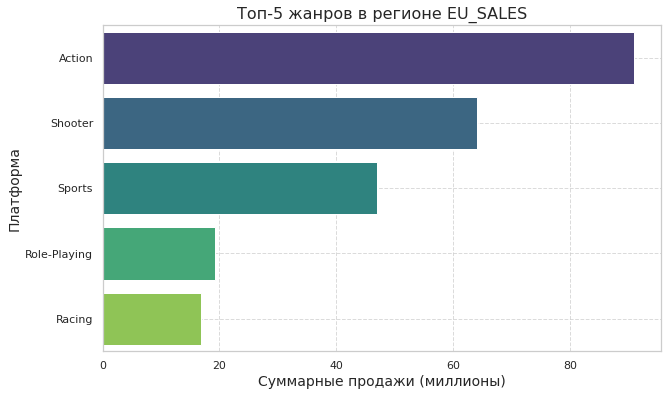

Топ-5 жанров в регионе EU_SALES:
           genre  eu_sales
0         Action     91.00
8        Shooter     64.04
10        Sports     46.96
7   Role-Playing     19.28
6         Racing     16.90


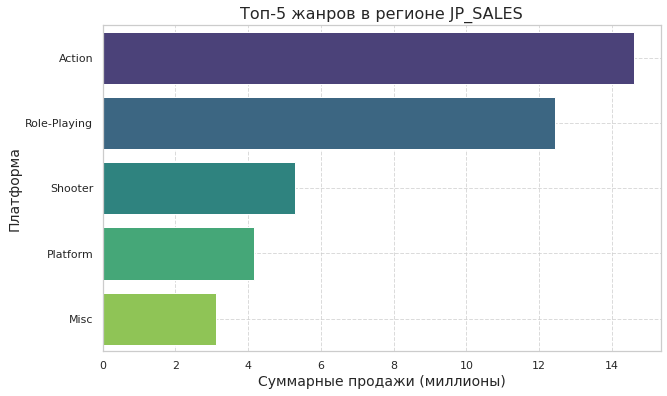

Топ-5 жанров в регионе JP_SALES:
          genre  jp_sales
0        Action     14.61
7  Role-Playing     12.44
8       Shooter      5.28
4      Platform      4.16
3          Misc      3.12


In [ ]:
# 1. Самые популярные платформы (топ-5) в каждом регионе
regions = ['na_sales', 'eu_sales', 'jp_sales']  # Список регионов

for region in regions:
    # Группируем по платформам и считаем суммарные продажи для региона
    genre_sales = data.groupby('genre')[region].sum().reset_index()

 # Сортируем по убыванию продаж
    genre_sales = genre_sales.sort_values(by=region, ascending=False)

    # Выбираем топ-5 платформ
    genre_sales = genre_sales.head(5)
# 2. Визуализация распределения продаж по жанрам
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region, y='genre', data=genre_sales, palette='viridis')
    plt.title(f'Топ-5 жанров в регионе {region.upper()}', fontsize=16)
    plt.xlabel('Суммарные продажи (миллионы)', fontsize=14)
    plt.ylabel('Платформа', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Вывод топ-5 платформ
    print(f"Топ-5 жанров в регионе {region.upper()}:")
    print(genre_sales)

Action (экшн):

Лидирует в Северной Америке и Европе, что отражает любовь к динамичным играм.

В Японии экшн-игры занимают второе место, уступая ролевым играм.

Shooter (стрелялки):

Второй по популярности в Северной Америке и Европе.

В Японии шутеры занимают последнее место в топе, что показывает меньший интерес к этому жанру.

Role-Playing (ролевые игры):

Популярны во всех регионах, но особенно в Японии, где они занимают первое место.

В Северной Америке и Европе ролевые игры тоже востребованы, но не так сильно.

Sports (спортивные игры):

Популярны в Северной Америке и Европе, но в Японии их нет в топе.

Это связано с культурными различиями в предпочтениях.

Racing (гонки):

В Европе гонки входят в топ-5, что отражает популярность этого жанра.

В других регионах гонки не так популярны.

Fighting (файтинги):

В Японии файтинги входят в топ-5, что показывает интерес к этому жанру.

В других регионах файтинги не так популярны.

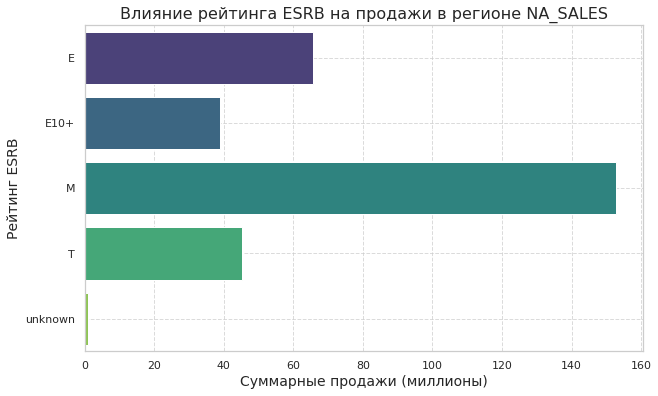

Влияние рейтинга ESRB на продажи в регионе NA_SALES:
    rating  na_sales
0        E     65.67
1     E10+     39.01
2        M    152.83
3        T     45.13
4  unknown      1.06


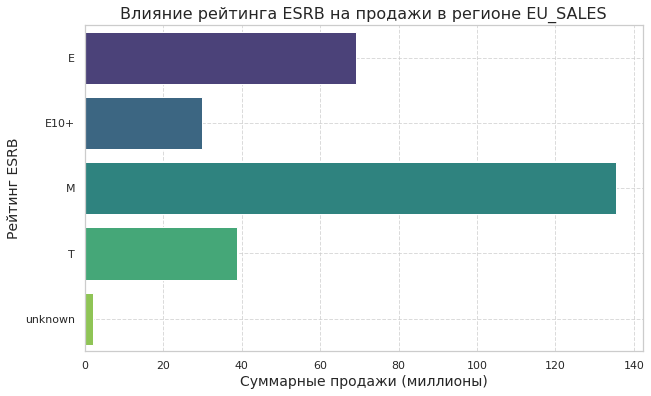

Влияние рейтинга ESRB на продажи в регионе EU_SALES:
    rating  eu_sales
0        E     69.18
1     E10+     29.97
2        M    135.48
3        T     38.87
4  unknown      2.07


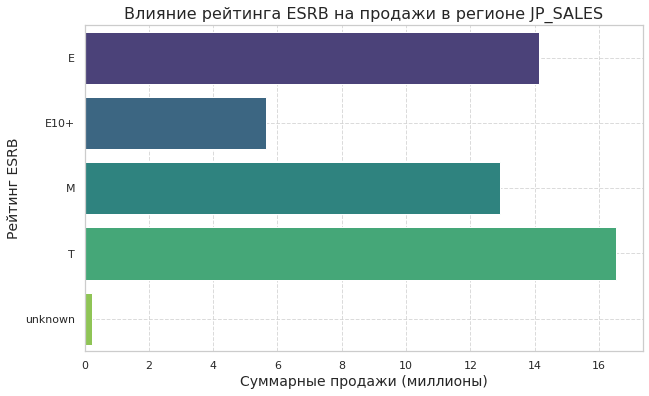

Влияние рейтинга ESRB на продажи в регионе JP_SALES:
    rating  jp_sales
0        E     14.14
1     E10+      5.65
2        M     12.93
3        T     16.54
4  unknown      0.23


In [ ]:
for region in regions:
    # Группируем по рейтингу ESRB и считаем суммарные продажи для региона
    esrb_sales = data.groupby('rating')[region].sum().reset_index()

    # Визуализация
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region, y='rating', data=esrb_sales, palette='viridis')
    plt.title(f'Влияние рейтинга ESRB на продажи в регионе {region.upper()}', fontsize=16)
    plt.xlabel('Суммарные продажи (миллионы)', fontsize=14)
    plt.ylabel('Рейтинг ESRB', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Вывод данных
    print(f"Влияние рейтинга ESRB на продажи в регионе {region.upper()}:")
    print(esrb_sales)

Северная Америка и Европа: Рейтинг M (для взрослых) сильнее всего влияет на продажи, что связано с популярностью взрослых жанров.

Япония: Рейтинг T (для подростков) лидирует, что отражает предпочтение сюжетных и ролевых игр.

Рейтинг E (для всех): Популярен во всех регионах, но не лидирует.

Рейтинг E10+ (для детей от 10 лет): Наименее популярен, но всё же востребован.

Таким образом, рейтинг ESRB действительно влияет на продажи, но его влияние различается в зависимости от региона.

# 5 Блок

Формулируем гипотезы:

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Используем ttest_ind, так как у нас две независимые выборки

Средний рейтинг Xbox One: 6.538181818181818
Средний рейтинг PC: 6.3020270270270276
p-значение: 0.17306926618147322
Не удалось отвергнуть нулевую гипотезу: средние рейтинги платформ одинаковые.


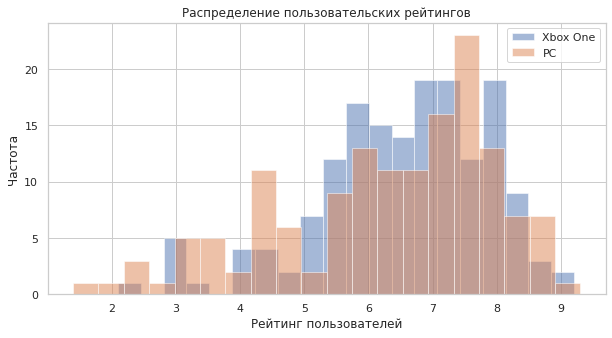

In [ ]:
xone_ratings = data[data['platform'] == 'XOne']['user_score']
pc_ratings = data[data['platform'] == 'PC']['user_score']

# Проверяем, есть ли данные
if len(xone_ratings) == 0 or len(pc_ratings) == 0:
    print("Ошибка: недостаточно данных для анализа.")
else:
    # Выполняем t-тест
    alpha = 0.05  # уровень значимости
    results = st.ttest_ind(xone_ratings, pc_ratings)

    # Вывод результатов
    print('Средний рейтинг Xbox One:', xone_ratings.mean())
    print('Средний рейтинг PC:', pc_ratings.mean())
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: средние рейтинги платформ различаются.')
    else:
        print('Не удалось отвергнуть нулевую гипотезу: средние рейтинги платформ одинаковые.')

    # Визуализация распределения рейтингов
    plt.figure(figsize=(10, 5))
    plt.hist(xone_ratings, alpha=0.5, label='Xbox One', bins=20)
    plt.hist(pc_ratings, alpha=0.5, label='PC', bins=20)
    plt.legend()
    plt.xlabel("Рейтинг пользователей")
    plt.ylabel("Частота")
    plt.title("Распределение пользовательских рейтингов")
    plt.show()

После проверки гепотезы можно с уверенностью сказать, что она оправдалась и средний рейтинг платформ примерно одинаковы

Формулировка гипотез:

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.


Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

Используем ttest_ind, так как у нас две независимые выборки

Средний рейтинг Action: 6.9362459546925574
Средний рейтинг Sports: 5.665454545454545
p-значение: 1.684099430689953e-16
Отвергаем нулевую гипотезу: средние рейтинги платформ различаются.


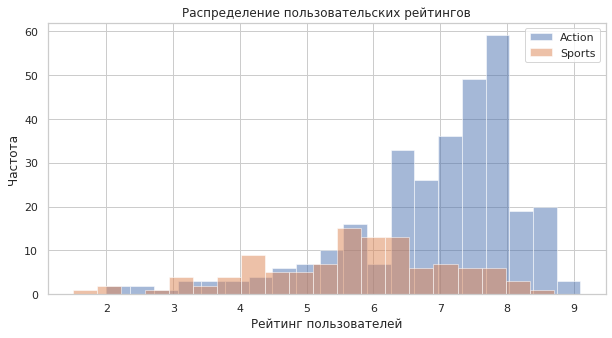

In [ ]:
action_ratings = data[data['genre'] == 'Action']['user_score']
sports_ratings = data[data['genre'] == 'Sports']['user_score']

# Проверяем, есть ли данные
if len(action_ratings) == 0 or len(sports_ratings) == 0:
    print("Ошибка: недостаточно данных для анализа.")
else:
    # Выполняем t-тест
    alpha = 0.05  # уровень значимости
    results = st.ttest_ind(action_ratings, sports_ratings)

    # Вывод результатов
    print('Средний рейтинг Action:', action_ratings.mean())
    print('Средний рейтинг Sports:', sports_ratings.mean())
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: средние рейтинги платформ различаются.')
    else:
        print('Не удалось отвергнуть нулевую гипотезу: средние рейтинги платформ одинаковые.')

    # Визуализация распределения рейтингов
    plt.figure(figsize=(10, 5))
    plt.hist(action_ratings, alpha=0.5, label='Action', bins=20)
    plt.hist(sports_ratings, alpha=0.5, label='Sports', bins=20)
    plt.legend()
    plt.xlabel("Рейтинг пользователей")
    plt.ylabel("Частота")
    plt.title("Распределение пользовательских рейтингов")
    plt.show()

После проверки гепотезы можно с уверенностью сказать, что она не оправдалась и средний рейтинг Action больше чем у Sports

# 6 Блок

Анализ данных интернет-магазина «Стримчик» включал очистку и предобработку, исправление ошибок и учет ключевых факторов, влияющих на продажи.


Зависимость продаж от оценок:

Продажи игр больше зависят от оценок критиков, чем от пользовательских рейтингов. Это значит, что мнение профессиональных критиков важнее для успеха игры, чем отзывы обычных игроков.

Проверка гипотез по рейтингам пользователей:

Игры жанра Action имеют средний рейтинг 6.936, а игры жанра Sports — 5.665. Разница между ними значительная, и p-значение (1.685e-16) подтверждает, что рейтинги этих жанров действительно отличаются. Это значит, что Action-игры в среднем нравятся пользователям больше, чем спортивные.

Для платформ Xbox One и PC средние рейтинги почти одинаковые: 6.538 для Xbox One и 6.302 для PC. P-значение (0.173) показывает, что разница между ними незначительна, то есть пользователи оценивают игры на этих платформах примерно одинаково.



Влияние рейтинга ESRB на продажи:

В Северной Америке и Европе больше всего продаются игры с рейтингом М (для взрослых), потому что там популярны взрослые жанры.

В Японии лидируют игры с рейтингом Т (для подростков), так как там любят сюжетные и ролевые игры.

Рейтинг Е (для всех) популярен во всех регионах, но не на первом месте, а рейтинг Е10+ (для детей от 10 лет) наименее популярен, но всё же находит свою аудиторию.



Популярность жанров в разных регионах:

Action: Самый популярный жанр в Северной Америке и Европе, а в Японии он на втором месте.

Shooter: Второй по популярности в Северной Америке и Европе, но в Японии шутеры почти не интересуют игроков.

Role-Playing: Особенно популярны в Японии, где они на первом месте. В других регионах тоже востребованы, но меньше.

Sports: Популярны в Северной Америке и Европе, но в Японии их нет в топе.

Racing: В Европе гонки входят в топ-5, а в других регионах менее популярны.

Fighting: В Японии файтинги в топ-5, но в других регионах их популярность ниже.
